<a href="https://colab.research.google.com/github/abiramiraji/codsoft/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic libaries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# PreProcessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Logistic Regression Model And Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [ ]:
dataset=pd.read_csv('/content/fraudTest.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#data preparation

In [ ]:
#Imputing Missing Values
dataset['city'] = np.where(dataset['city'].isna() , dataset['city'].mode(dropna = True) , dataset['city'])
dataset['state'] = np.where(dataset['state'].isna() , dataset['state'].mode(dropna = True) , dataset['state'])
dataset['zip'] = np.where(dataset['zip'].isna() , dataset['zip'].median(skipna = True) , dataset['zip'])
dataset['lat'] = np.where(dataset['lat'].isna() , dataset['lat'].median(skipna = True) , dataset['lat'])
dataset['long'] = np.where(dataset['long'].isna() , dataset['long'].median(skipna = True) , dataset['long'])
dataset['city_pop'] = np.where(dataset['city_pop'].isna() , dataset['city_pop'].median(skipna = True) , dataset['city_pop'])
dataset['job'] = np.where(dataset['job'].isna() , dataset['job'].mode(dropna = True) , dataset['job'])
dataset['dob'] = np.where(dataset['dob'].isna() , dataset['dob'].mode(dropna = True) , dataset['dob'])
dataset['trans_num'] = np.where(dataset['trans_num'].isna() , dataset['trans_num'].mode(dropna = True) , dataset['trans_num'])
dataset['unix_time'] = np.where(dataset['unix_time'].isna() , dataset['unix_time'].median(skipna = True) , dataset['unix_time'])
dataset['merch_lat'] = np.where(dataset['merch_lat'].isna() , dataset['merch_lat'].median(skipna = True) , dataset['merch_lat'])
dataset['merch_long'] = np.where(dataset['merch_long'].isna() , dataset['merch_long'].median(skipna = True) , dataset['merch_long'])
dataset['is_fraud'] = np.where(dataset['is_fraud'].isna() , dataset['is_fraud'].median(skipna = True) , dataset['is_fraud'])


In [ ]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return data


In [ ]:
encode(dataset)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,2.86,151,115,1,341,...,33.9659,-80.9355,333497.0,275,376,98699,1.371817e+09,33.986391,-81.200714,0.0
1,1,1,3573030041201292,591,10,29.84,163,457,0,354,...,40.3207,-110.4360,302.0,392,760,108785,1.371817e+09,39.450498,-109.960431,0.0
2,2,2,3598215285024754,611,5,41.28,24,249,0,865,...,40.6729,-73.5365,34496.0,259,421,433979,1.371817e+09,40.495810,-74.196111,0.0
3,3,3,3591919803438423,222,9,60.05,42,457,1,320,...,28.5697,-80.8191,54767.0,407,718,71993,1.371817e+09,28.812398,-80.883061,0.0
4,4,4,3526826139003047,292,13,3.19,247,261,1,548,...,44.2529,-85.0170,1126.0,196,177,190585,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,544755,30560609640617,507,5,43.77,235,315,1,531,...,40.4931,-91.8912,519.0,460,334,336391,1.388534e+09,39.946837,-91.333331,0.0
555715,555715,544756,3556613125071656,264,7,111.84,171,424,1,540,...,29.0393,-95.4401,28739.0,198,890,70372,1.388534e+09,29.661049,-96.186633,0.0
555716,555716,544757,6011724471098086,496,7,86.88,18,239,0,126,...,46.1966,-118.9017,3684.0,294,609,235088,1.388534e+09,46.658340,-119.715054,0.0
555717,555717,544758,4079773899158,75,13,7.99,111,342,1,663,...,44.6255,-116.4493,129.0,58,331,43546,1.388534e+09,44.470525,-117.080888,0.0


#EDA

In [ ]:
dataset.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,...,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,272908.154585,4.178387e+17,343.086430,6.237059,69.392810,173.152295,247.712797,0.451367,459.875509,...,38.543253,-90.231325,8.822189e+04,241.755040,494.567154,277859.000000,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,157507.512846,1.309837e+18,201.284993,3.912874,156.745941,95.372066,133.449728,0.497630,263.994300,...,5.061336,13.721780,3.003909e+05,136.327924,256.767245,160422.401459,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,0.000000,6.041621e+10,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,20.027100,-165.672300,2.300000e+01,0.000000,0.000000,0.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,136401.500000,1.800429e+14,166.000000,3.000000,9.630000,86.000000,138.000000,0.000000,237.000000,...,34.668900,-96.798000,7.410000e+02,124.000000,283.000000,138929.500000,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,273099.000000,3.521417e+15,346.000000,6.000000,47.290000,176.000000,251.000000,0.000000,457.000000,...,39.371600,-87.476900,2.408000e+03,239.000000,517.000000,277859.000000,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,409786.500000,4.635331e+15,515.000000,10.000000,83.010000,248.000000,366.000000,1.000000,682.000000,...,41.894800,-80.175200,1.968500e+04,362.000000,710.000000,416788.500000,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,544759.000000,4.992346e+18,692.000000,13.000000,22768.110000,340.000000,470.000000,1.000000,923.000000,...,65.689900,-67.950300,2.906700e+06,477.000000,909.000000,555718.000000,1.388534e+09,66.679297,-66.952026,1.000000


#univariate analysis

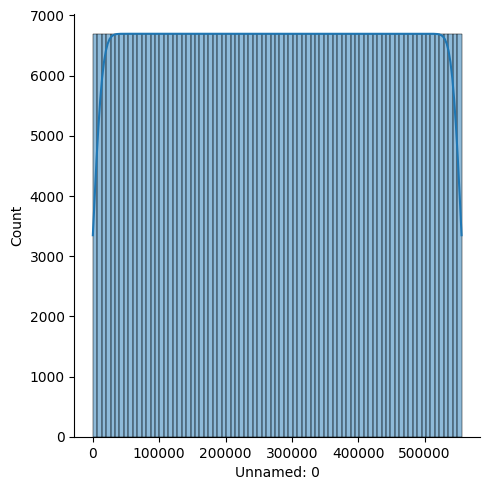

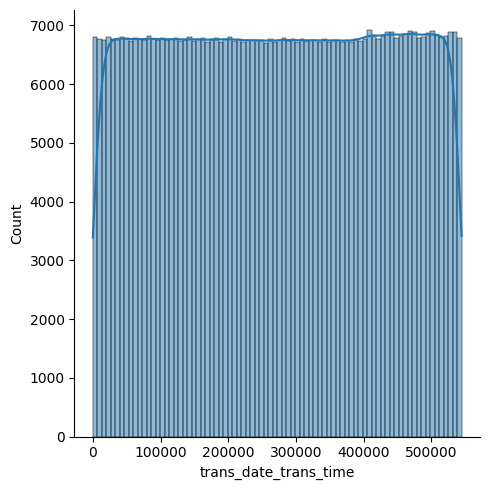

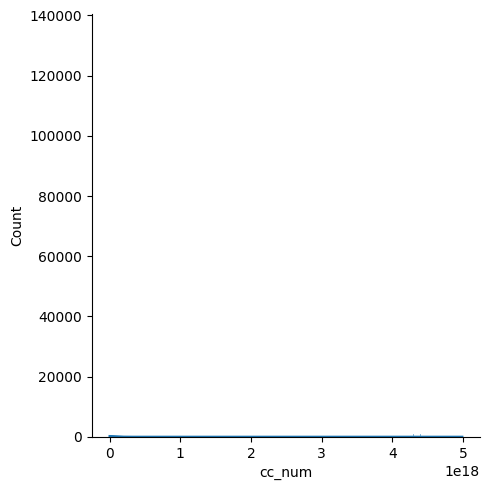

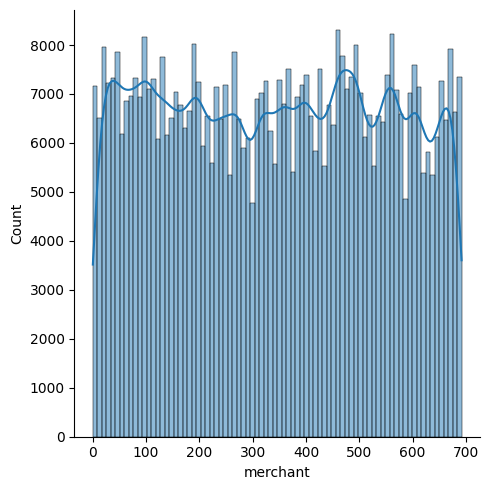

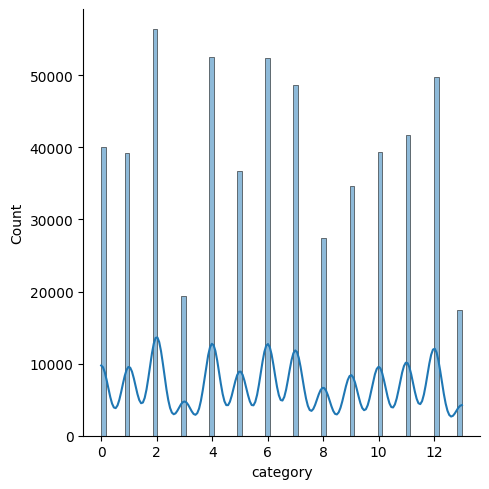

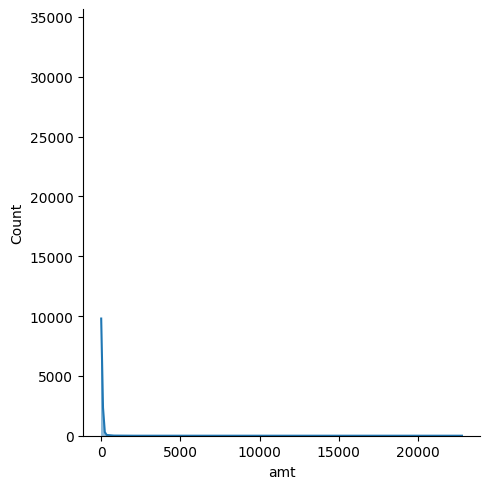

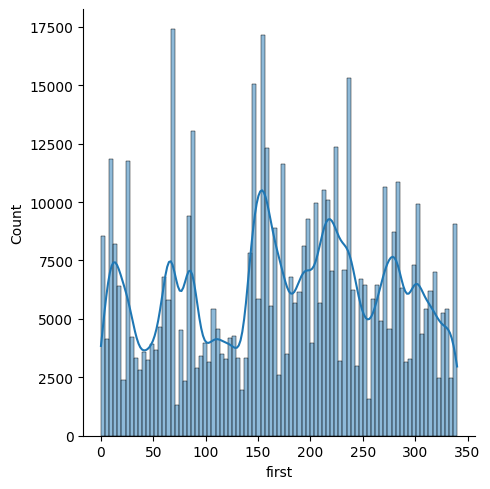

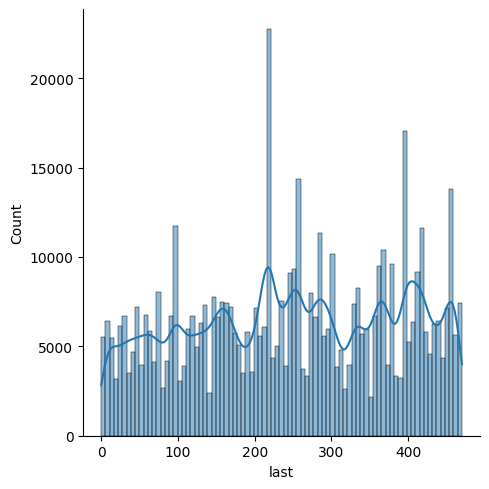

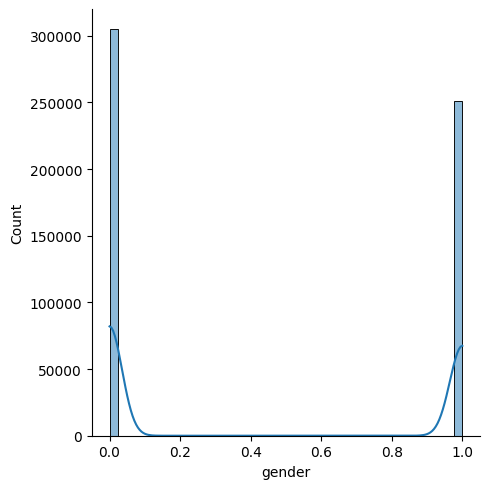

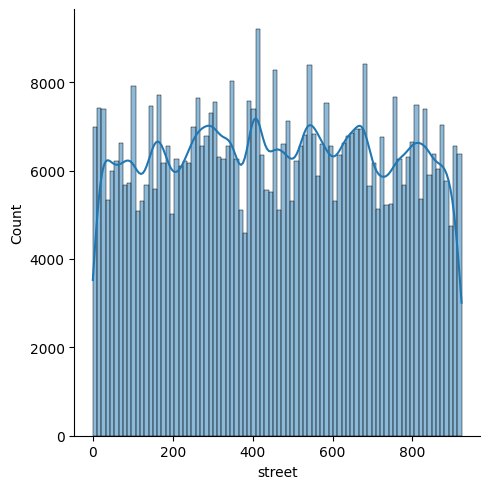

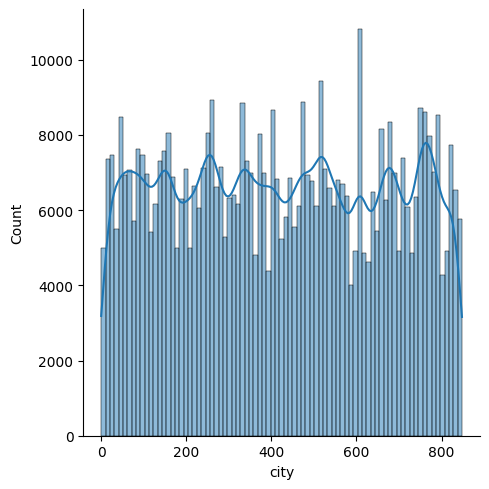

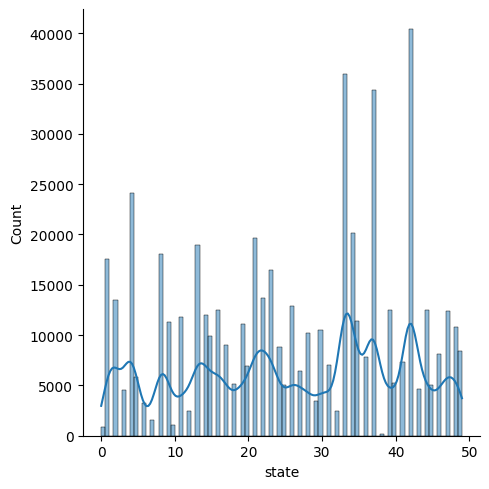

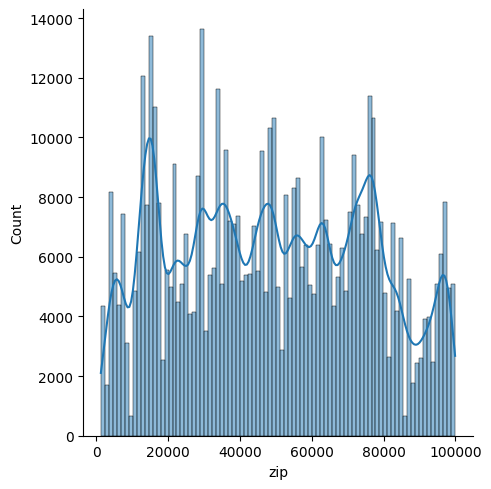

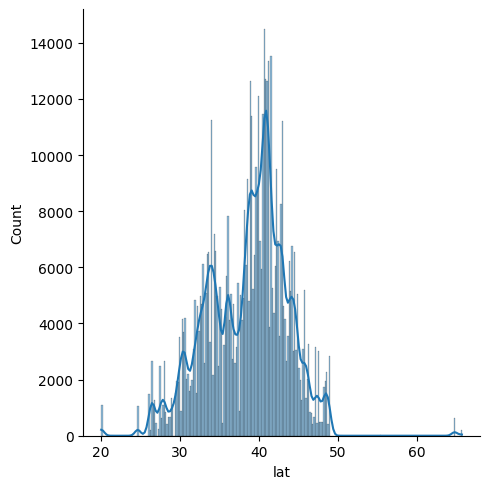

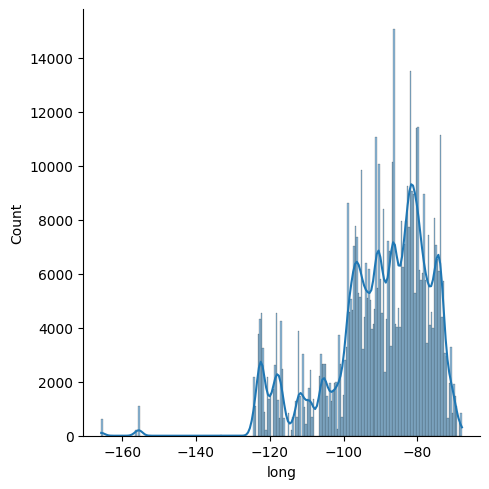

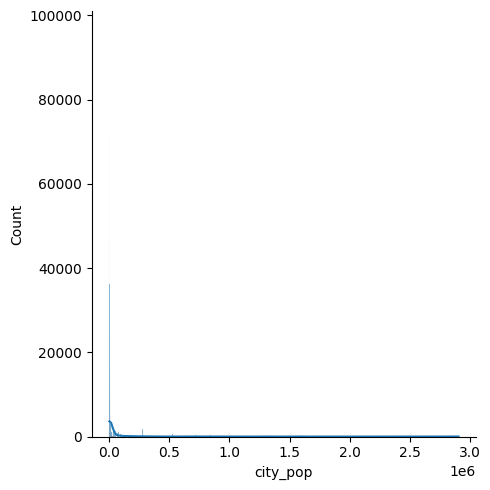

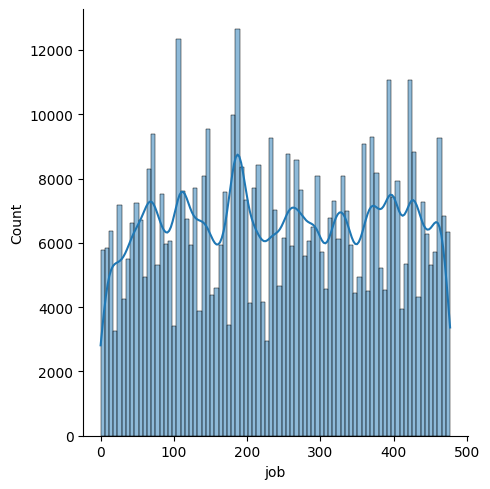

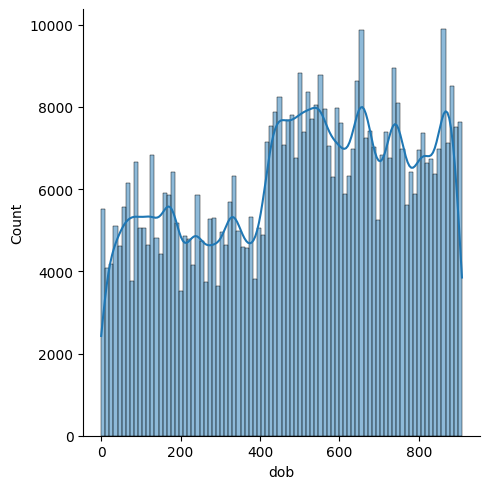

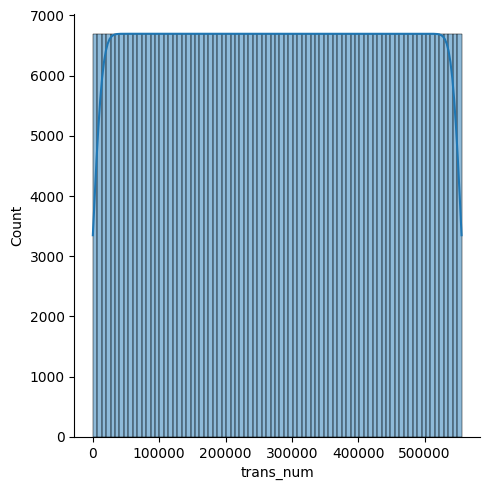

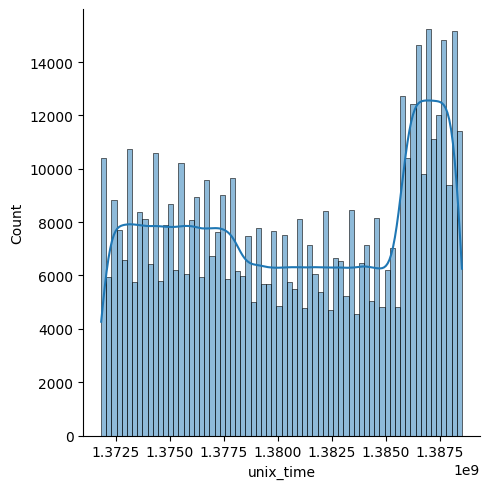

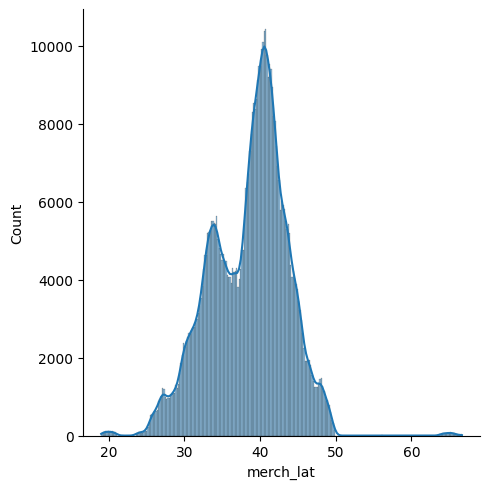

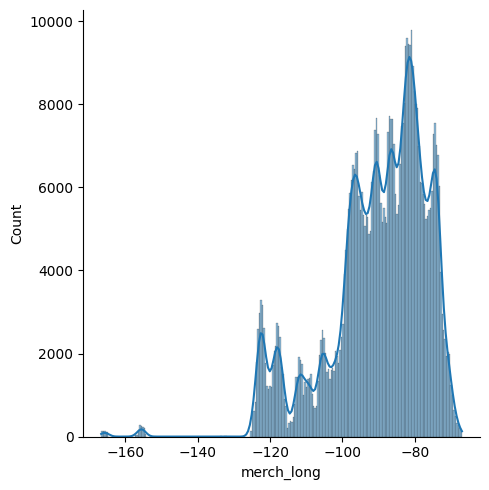

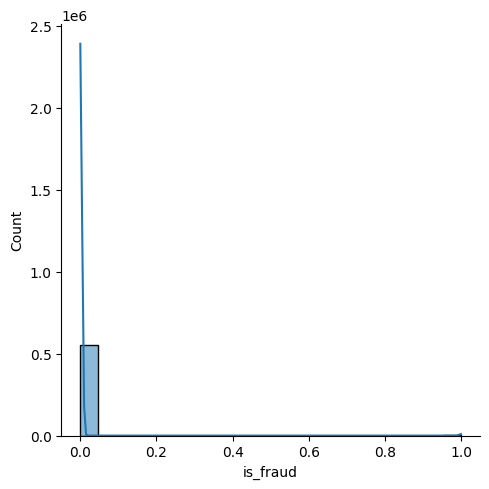

In [ ]:
for i in dataset.columns :
   sns.displot(dataset[i] , kde = True)

#bivariate analysis

<Axes: >

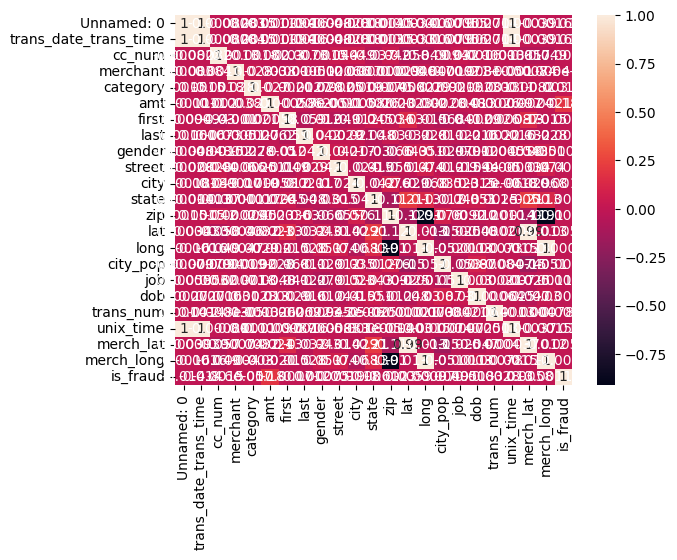

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

#splitting data

In [ ]:
x = dataset.drop(['is_fraud'] , axis = 1)
y = dataset['is_fraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(444575, 22)
(111144, 22)
(444575,)
(111144,)


In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

#logistic regression

In [ ]:
logreg = LogisticRegression(max_iter =600000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=600000)

In [ ]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [ ]:
y_hat_train_logreg = logreg.predict(x_train)
y_hat_test_logreg = logreg.predict(x_test)


In [ ]:
model_eval(y_train , y_hat_train_logreg)

The Accuracy of the Model is: 1.0
[[442856      0]
 [  1719      0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    442856
         1.0       0.00      0.00      0.00      1719

    accuracy                           1.00    444575
   macro avg       0.50      0.50      0.50    444575
weighted avg       0.99      1.00      0.99    444575



In [ ]:
model_eval(y_test , y_hat_test_logreg)

The Accuracy of the Model is: 1.0
[[110718      0]
 [   426      0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110718
         1.0       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

